In [1]:
from astropy.table import Table, vstack
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import astropy.units as u
import seaborn as sns

In [2]:
decals_raw = Table.read('GalfitM_DECALS_183.csv', format='ascii')
decals = decals_raw[decals_raw['type_1'] != 'PSF']
d_stars = decals_raw[decals_raw['type_1'] == 'PSF']
splus = Table.read('/home/seba/Documents/CG/MorphoPLUS_SFCGs/Morphoplus_groups/Catalogos_try/GalfitM_output_final_3.csv', format='ascii')
# Definir las columnas que deseas cambiar
'''columnas_a_cambiar = ['n_R', 'n_G', 'n_I', 'n_Z', 'RE_R', 'RE_G', 'RE_I', 'RE_Z', 'MAG_R', 'MAG_G', 'MAG_I', 'MAG_Z']

# Crear un diccionario para mapear los nombres antiguos a los nuevos solo para las columnas específicas
column_mapping = {col: re.sub(r'_(G|R|I|Z)', lambda x: f'_{x.group(1).lower()}', col) for col in columnas_a_cambiar}

# Renombrar las columnas en la tabla
for old_name, new_name in column_mapping.items():
    if old_name in splus.colnames:
        splus.rename_column(old_name, new_name)'''
decals

Group_1,Gal_1,ID,ra_1,dec_1,type_1,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_1,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_1,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_1,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_1,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z,brickid,brickname,objid,type_2,ra_2,dec_2,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_2,mag_r_2,mag_i_2,mag_z_2,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_2,Gal_2,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation_2,Separation
int64,int64,int64,float64,float64,str3,float64,float64,float64,float64,float64,str10,str12,float64,float64,str9,str11,str8,str13,float64,float64,float64,float64,float64,float64,str10,str12,float64,float64,str9,str11,str8,str13,float64,float64,float64,float64,float64,float64,str8,str12,float64,float64,str9,str11,str8,str13,float64,float64,float64,float64,float64,float64,str9,str12,str9,str9,str9,str11,str8,str13,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,float64
1,1,1645,0.079356474601419,-22.57609230832414,SER,0.444957228535091,892.2833,0.0039,838.5585,0.0041,9.8294,0.0435,18.256,0.0034,1.7689,0.0117,0.9451,0.0017,24.0265,1.1276,892.2833,0.0039,838.5585,0.0041,9.0826,0.0228,17.6082,0.0018,2.3542,0.0070,0.9451,0.0017,24.0265,1.1276,892.2833,0.0039,838.5585,0.0041,8.3702,0.0367,17.3253,0.0028,2.9126,0.0137,0.9451,0.0017,24.0265,1.1276,892.2833,0.0039,838.5585,0.0041,7.5989,0.0678,17.2215,0.0056,3.5171,0.0241,0.9451,0.0017,24.0265,1.1276,203988,0001m225,1645,SER,0.079356474601419,-22.57609230832414,0.017528892,48.266956,92.56008,126.76573,154.32976,1.4651365,1.2320019,1.3169467,1.1513813,2.8488412,13063.839,2.6694756,61024.297,0.017965661,632260.8,0.022896547,737468.5,18.290874,17.58394,17.242495,17.028875,17.22928,17.531992,15.749675,--,0.706934,0.34144592,0.55506516,0.21361923,0.0790833,-22.5758889,1,1,00 00 18.98,-22 34 33.2,0.0,--,20.2714,19.9779,Simbad,1.166537474480667,0.0
1,3,2068,0.1003956575335607,-22.58890589524607,SER,0.444957228535091,625.556,0.0053,662.3559,0.007,13.0738,0.0145,17.5166,0.0011,0.5929,0.0020,0.7279,0.0005,-1.3852,0.0969,625.556,0.0053,662.3559,0.007,12.7210,0.0083,16.9496,0.0007,0.7123,0.0010,0.7279,0.0005,-1.3852,0.0969,625.556,0.0053,662.3559,0.007,12.3844,0.0121,16.6317,0.0009,0.8263,0.0017,0.7279,0.0005,-1.3852,0.0969,625.556,0.0053,662.3559,0.007,12.0200,0.0215,16.4840,0.0019,0.9497,0.0032,0.7279,0.0005,-1.3852,0.0969,203988,0001m225,2068,SER,0.1003956575335607,-22.58890589524607,0.017668108,96.314026,164.30281,224.06183,262.9318,1.374724,1.2320019,1.4043026,1.1513813,0.74041283,241120.66,3.2906244,205470.22,0.15574026,3809064.5,-0.010747138,1612471.6,17.540775,16.960888,16.62408,16.450392,16.640575,17.031475,15.055349,12.263554,0.5798874,0.33680725,0.51049614,0.17368889,0.1002083,-22.5888056,1,3,00 00 24.05,-22 35 19.7,0.0,--,19.3392,19.222,Simbad,0.7198446044828247,0.0
1,2,1873,0.0912554639415616,-22.58790183800087,SER,0.444957228535091,741.4711,0.0127,676.2068,0.0073,8.3541,0.0228,18.9807,0.0025,0.4985,0.0061,0.4999,0.0010,76.0773,0.1251,741.4711,0.0127,676.2068,0.0073,8.3075,0.0169,18.6522,0.0021,0.6517,0.0035,0.4999,0.0010,76.0773,0.1251,741.4711,0.0127,676.2068,0.0073,8.2629,0.0276,18.4092,0.0031,0.7978,0.0070,0.4999,0.0010,76.0773,0.1251,741.4711,0.0127,676.2068,0.0073,8.2147,0.0452,18.3382,0.0064,0.9559,0.0125,0.4999,0.0010,76.0773,0.1251,203988,0001m225,1873,SER,0.0912554639415616,-22.58790183800087,0.017578758,25.540777,3

In [3]:
filtros = ['g', 'r', 'i', 'z']
#filtros_splus = ['G', 'R', 'I', 'Z']
for filtro in filtros:        
    decals['n_' + filtro] = pd.to_numeric(decals['n_' + filtro], errors='coerce')
    decals['RE_' +filtro] = pd.to_numeric(decals['RE_' + filtro], errors = 'coerce')
    decals['e_n_' + filtro] = pd.to_numeric(decals['n_' + filtro], errors='coerce')
    decals['e_RE_' +filtro] = pd.to_numeric(decals['RE_' + filtro], errors = 'coerce')
    d_stars['n_' + filtro] = pd.to_numeric(d_stars['n_' + filtro], errors='coerce')
    d_stars['RE_' +filtro] = pd.to_numeric(d_stars['RE_' + filtro], errors = 'coerce')
    d_stars['e_n_' + filtro] = pd.to_numeric(d_stars['n_' + filtro], errors='coerce')
    d_stars['e_RE_' +filtro] = pd.to_numeric(d_stars['RE_' + filtro], errors = 'coerce')
#    splus['n_' + filtro] = pd.to_numeric(splus['n_' + filtro], errors='coerce')
#    splus['RE_' +filtro] = pd.to_numeric(splus['RE_' + filtro], errors = 'coerce')
#    splus['MAG_' +filtro] = pd.to_numeric(splus['MAG_' + filtro], errors = 'coerce')
#    splus['e_n_' + filtro] = pd.to_numeric(splus['n_' + filtro], errors='coerce')
#    splus['e_RE_' +filtro] = pd.to_numeric(splus['RE_' + filtro], errors = 'coerce')

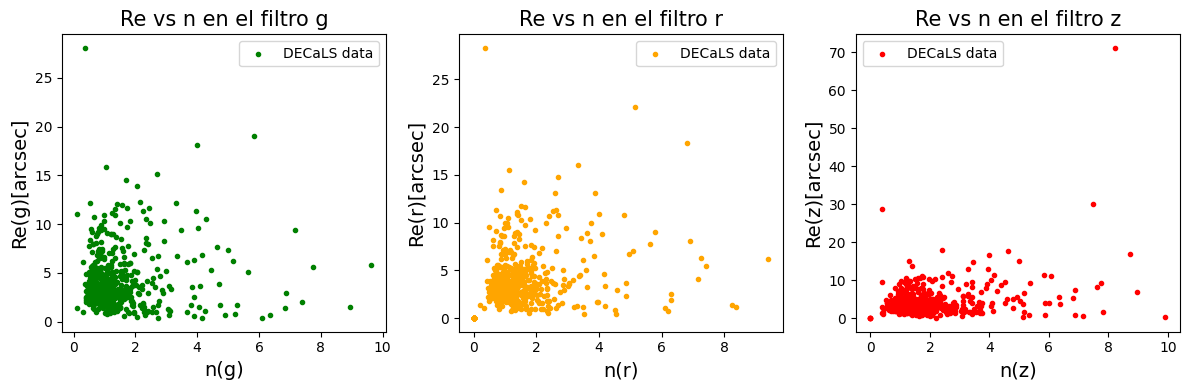

In [5]:
# Función para graficar Re vs n en grz.
def graficar_re_n(axs, archivo, color_g, color_r, color_z, label, pixel_scale):
    
    # Convertir las columnas de interés a tipos de datos numéricos
    for filtro in filtros:
        archivo['n_' + filtro] = pd.to_numeric(archivo['n_' + filtro], errors='coerce')
        archivo['RE_' +filtro] = pd.to_numeric(archivo['RE_' + filtro], errors = 'coerce')
    
    axs[0].scatter(archivo['n_g'], archivo['RE_g']*pixel_scale, label=label, color=color_g, marker='.')
    axs[0].set_xlabel('n(g)', fontsize = 14)
    axs[0].set_ylabel('Re(g)[arcsec]', fontsize=14)
    axs[0].set_title(f'Re vs n en el filtro g', fontsize=15)
    axs[0].set_xlim()
    axs[0].set_ylim()

    axs[1].scatter(archivo['n_r'], archivo['RE_r']*pixel_scale, label=label, color=color_r, marker='.')
    axs[1].set_xlabel('n(r)', fontsize = 14)
    axs[1].set_ylabel('Re(r)[arcsec]', fontsize=14)
    axs[1].set_title(f'Re vs n en el filtro r', fontsize=15)
    axs[1].set_xlim()
    axs[1].set_ylim()

    axs[2].scatter(archivo['n_z'], archivo['RE_z']*pixel_scale, label=label, color=color_z, marker='.')
    axs[2].set_xlabel('n(z)', fontsize = 14)
    axs[2].set_ylabel('Re(z)[arcsec]', fontsize=14)
    axs[2].set_title(f'Re vs n en el filtro z', fontsize=15)
    axs[2].set_xlim()
    axs[2].set_ylim()
    
    # Añadir leyenda en cada sub-gráfico
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Graficar
graficar_re_n(axs[:], decals[decals['n_i']!=0.0], 'green', 'orange', 'red', 'DECaLS data', 0.262)
#graficar_re_n(axs[:], splus, 'cyan', 'darkorchid', 'pink', 'SPLUS data', 0.55)
#graficar_re_n(axs[:], d_stars[d_stars['n_i'] !=0.0], 'blue', 'black', 'lightgreen', 'Stars', 0.262)
# Ajustar diseño y mostrar gráficos
plt.legend()
plt.tight_layout()
plt.show()
#print(len(decals[decals['n_i']!=0.0]), len(splus))


/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


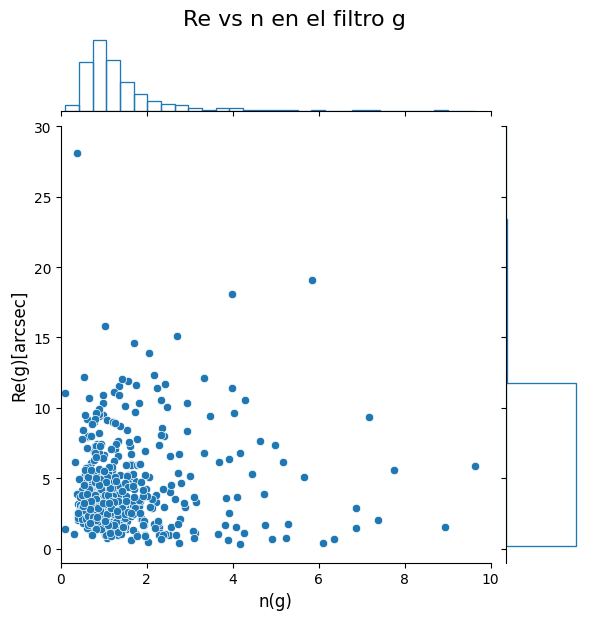

In [23]:
# Crear un gráfico conjunto con seaborn
x = decals[(decals['n_i']!=0.0) & (decals['RE_g'] != 0.0)]['n_g']
y = decals[(decals['n_i']!=0.0) & (decals['RE_g'] != 0.0)]['RE_g']*0.262

g = sns.jointplot(x=x, y=y, kind="scatter", marginal_kws=dict(bins=30, fill=False))

# Personalizar el gráfico si es necesario
g.set_axis_labels('n(g)', 'Re(g)[arcsec]', fontsize=12)
plt.suptitle('Re vs n en el filtro g', y=1.02, fontsize=16)
g.ax_joint.set_xlim(0, 10)
g.ax_joint.set_ylim(-1, 30)

# Mostrar el gráfico
plt.show()

In [20]:
valores_sersic = np.array([decals['n_' + filtro] for filtro in filtros])
valores_sersic_splus = np.array([splus['n_'+filtro] for filtro in filtros])
# Función para calcular la mediana sin NaN y ceros
def calcular_mediana_sin_nan_ni_ceros(valores):
    # Filtrar NaN y ceros
    valores_filtrados = valores[(~np.isnan(valores)) & (valores != 0)]
    if len(valores_filtrados) > 0:
        return np.median(valores_filtrados)
    else:
        return np.nan

# Calcular medianas para cada filtro en 'valores_sersic'
medianas_valores_sersic = np.array([calcular_mediana_sin_nan_ni_ceros(valores_sersic[i]) for i in range(len(filtros))])

# Calcular medianas para cada filtro en 'valores_sersic_splus'
medianas_valores_sersic_splus = np.array([calcular_mediana_sin_nan_ni_ceros(valores_sersic_splus[i]) for i in range(len(filtros))])

# Imprimir resultados
print("Medianas para valores_sersic:")
print(medianas_valores_sersic)

print("\nMedianas para valores_sersic_splus:")
print(medianas_valores_sersic_splus)

Medianas para valores_sersic:
[1.1034  1.2702  1.4277  1.51955]

Medianas para valores_sersic_splus:
[1.0666  1.24275 1.39305 1.4659 ]


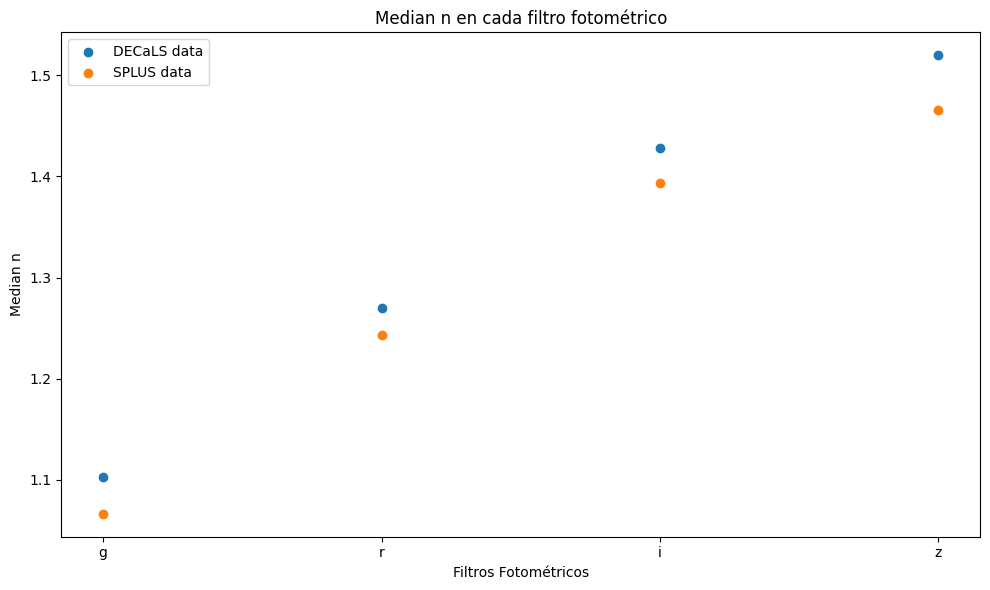

In [21]:
# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))

plt.scatter(filtros, medianas_valores_sersic, label='DECaLS data')
plt.scatter(filtros, medianas_valores_sersic_splus, label='SPLUS data')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Median n')
plt.title('Median n en cada filtro fotométrico')
#plt.legend()

plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
valores_re = np.array([decals['RE_' + filtro] for filtro in filtros])
valores_re_splus = np.array([splus['RE_'+filtro] for filtro in filtros])
# Función para calcular la mediana sin NaN y ceros
def calcular_mediana_sin_nan_ni_ceros(valores):
    # Filtrar NaN y ceros
    valores_filtrados = valores[(~np.isnan(valores)) & (valores != 0)]
    if len(valores_filtrados) > 0:
        return np.median(valores_filtrados)
    else:
        return np.nan

# Calcular medianas para cada filtro en 'valores_sersic'
medianas_valores_re = np.array([calcular_mediana_sin_nan_ni_ceros(valores_re[i]) for i in range(len(filtros))])*0.262

# Calcular medianas para cada filtro en 'valores_sersic_splus'
medianas_valores_re_splus = np.array([calcular_mediana_sin_nan_ni_ceros(valores_re_splus[i]) for i in range(len(filtros))])*0.55

# Imprimir resultados
print("Medianas para valores_re:")
print(medianas_valores_re)

print("\nMedianas para valores_re_splus:")
print(medianas_valores_re_splus)

Medianas para valores_re:
[3.4290691 3.388577  3.329103  3.3225268]

Medianas para valores_re_splus:
[3.085445  2.782505  2.6526775 2.56795  ]


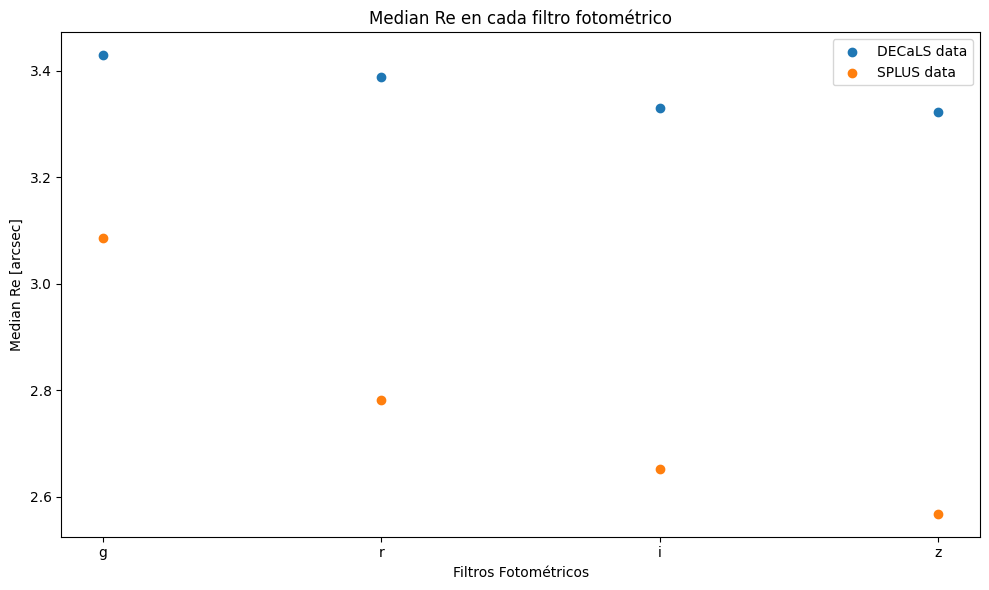

In [23]:
# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))

plt.scatter(filtros, medianas_valores_re, label='DECaLS data')
plt.scatter(filtros, medianas_valores_re_splus, label='SPLUS data')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Median Re [arcsec]')
plt.title('Median Re en cada filtro fotométrico')
#plt.legend()

plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_33584/2230754744.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=n_r, y=g_r_decals, cmap='Blues', shade=True, cbar=False)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


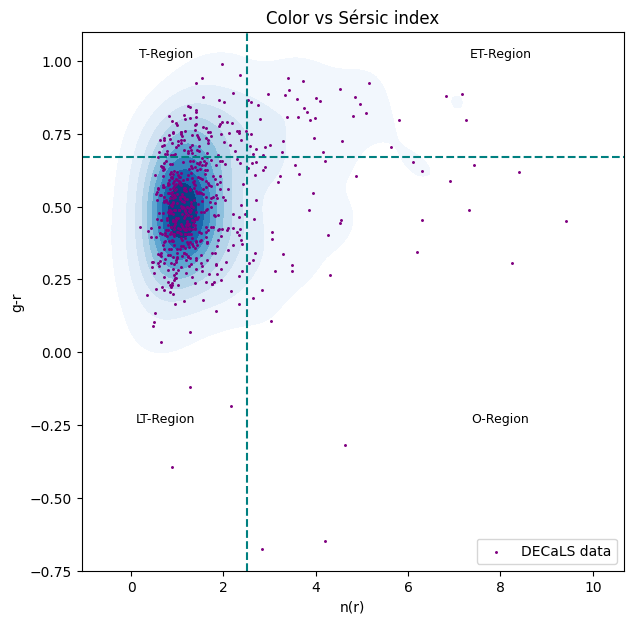

In [29]:
#u_r_o = filtered_splus['MAG_g'] - filtered_splus['MAG_r']
decals_no_zero = decals[decals['n_r']!=0.0]
g_r_decals = decals_no_zero['MAG_g_1'] - decals_no_zero['MAG_r_1']
n_r = decals_no_zero['n_r']
decals_no_zero_stars = d_stars[d_stars['n_r']!=0.0]
g_r_decals_stars = decals_no_zero_stars['MAG_g_1'] - decals_no_zero_stars['MAG_r_1']
plt.figure(figsize=(7, 7))

sns.kdeplot(x=n_r, y=g_r_decals, cmap='Blues', shade=True, cbar=False)
plt.scatter(decals_no_zero['n_r'], g_r_decals, marker='.', label='DECaLS data', s=5, color='purple')

#plt.scatter(decals_no_zero_stars['n_r'], g_r_decals_stars, marker='.', label='Stars')

plt.ylim(-0.75, 1.1)
#plt.xlim(0, )
plt.title('Color vs Sérsic index')
plt.xlabel('n(r)')
plt.ylabel('g-r')
# Añadir una línea horizontal en y=50
plt.legend(loc='lower right')
plt.axhline(y=0.67, color='teal', linestyle='--')

# Añadir una línea vertical en x=5
plt.axvline(x=2.5, color='teal', linestyle='--')

# Agregar texto en coordenadas específicas
plt.text(0.75, 1, 'T-Region', fontsize=9, ha='center', va='bottom', color='black')
plt.text(0.75, -0.25, 'LT-Region', fontsize=9, ha='center', va='bottom', color='black')
plt.text(8, 1, 'ET-Region', fontsize=9, ha='center', va='bottom', color='black')
plt.text(8, -0.25, 'O-Region', fontsize=9, ha='center', va='bottom', color='black')

plt.show()

In [36]:
grouped_decals = decals.group_by('Group_1')

valid_groups=[]

for group in grouped_decals.groups:
    if any (group['zmemb'] != 0):
        valid_groups.append(group['Group_1'][0])

filtered_table = decals[np.isin(decals['Group_1'], valid_groups)]

# Crear una función para reemplazar los valores de 'zmemb' que son 0
def replace_zeros(group):
    non_zero_values = group['zmemb'][group['zmemb'] != 0]
    if len(non_zero_values) > 0:
        replacement_value = non_zero_values[0]
        group['zmemb'] = np.where(group['zmemb'] == 0, replacement_value, group['zmemb'])
    return group

# Aplicar la función a cada grupo y unir los resultados
result_groups = []
for group in filtered_table.group_by('Group_1').groups:
    result_groups.append(replace_zeros(group))

table_redshift = vstack(result_groups)

final_table = table_redshift[table_redshift['n_i']!=0.0]
final_table_z = table_redshift[table_redshift['n_z'] != 0.0]


print(len(final_table), len(final_table_z))

389 493


### Calculamos la masa estelar de las galaxias (Taylor et al. 2011)

##### $log(M_{*}/M_{\odot}) = 1.15 + 0.7 \times (g-i)_{0} - 0.4 \times M_{i}$

### La magnitud absoluta utilizando el módulo de distancia 

#### $m - M = 5log(\frac{D}{1pc}) - 5 $

### La distancia utilizando Ley de Hubble-Lemaitre

#### $D = \frac{cz}{H_{0}}$

Con c = 300000 km/s y $H_0$ = 67.4 km/s/Mpc

In [37]:
H_0 = 67.4 #km/s/Mpc
c = 300000
final_table['Distance (Mpc)'] = (final_table['zmemb']*c)/H_0

final_table['M_FUV'] = final_table['FUV'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
final_table['M_NUV'] = final_table['NUV'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
final_table['M_i'] = final_table['mag_i_2'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
final_table['M_z'] = final_table['mag_z_2'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5

final_table['log(M_*)'] = (1.15 + 0.7*(final_table['mag_g_2'] - final_table['mag_i_2']) - 0.4*final_table['M_i'])*u.M_sun
final_table['log(M_*)_z'] = (1.15 + 0.7*(final_table['mag_g_2'] - final_table['mag_z_2']) - 0.4*final_table['M_z'])*u.M_sun

In [38]:
final_table_z['Distance (Mpc)'] = (final_table_z['zmemb']*c)/H_0

final_table_z['M_z'] = final_table_z['mag_z_2'] - 5*np.log10(final_table_z['Distance (Mpc)']*1000000) + 5
final_table_z['log(M_*)'] = (1.15 + 0.7*(final_table_z['mag_g_2'] - final_table_z['mag_z_2']) - 0.4*final_table_z['M_z'])*u.M_sun

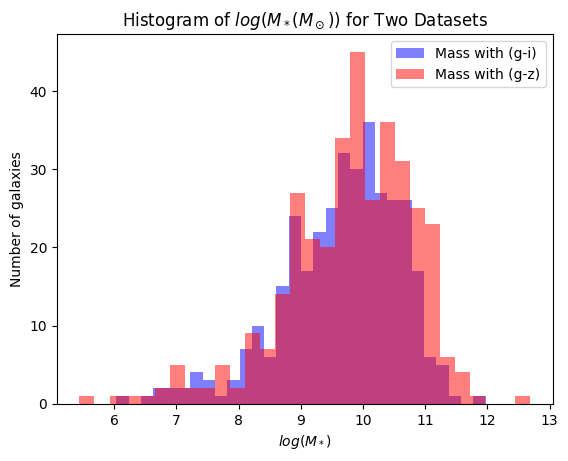

In [90]:
# Suponiendo que 'final_table' y 'final_table_z' son tus tablas
data1 = final_table['log(M_*)']
data2 = final_table['log(M_*)_z']

# Crear el histograma con transparencia
plt.hist(data1, bins=30, alpha=0.5, label='Mass with (g-i)', color='blue')
plt.hist(data2, bins=30, alpha=0.5, label='Mass with (g-z)', color='red')

# Agregar etiquetas y título
plt.xlabel('$log(M_*)$')
plt.ylabel('Number of galaxies')
plt.title('Histogram of $log(M_*(M_\odot))$ for Two Datasets')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Coeficiente de correlación: 0.9920777646350132


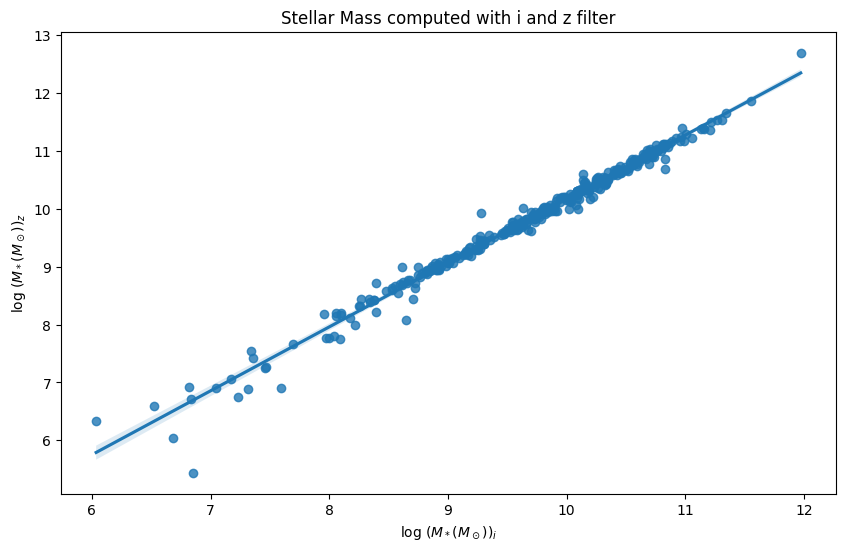

In [80]:
# Verificar y limpiar los datos
valid_indices = np.isfinite(data1) & np.isfinite(data2)
data1_clean = data1[valid_indices]
data2_clean = data2[valid_indices]

# Calcular el coeficiente de correlación solo si hay datos válidos
if len(data1_clean) > 0 and len(data2_clean) > 0:
    correlation_coefficient = np.corrcoef(data1_clean, data2_clean)[0, 1]
    print("Coeficiente de correlación:", correlation_coefficient)
else:
    print("No hay suficientes datos válidos para calcular el coeficiente de correlación.")

# Configurar la figura y el tamaño
plt.figure(figsize=(10, 6))

# Graficar la regresión lineal
sns.regplot(x=data1_clean, y=data2_clean)

# Configurar etiquetas de los ejes
plt.xlabel('log ($M_*(M_\odot))_i$')
plt.ylabel('log ($M_*(M_\odot))_z$')
plt.title('Stellar Mass computed with i and z filter')

# Mostrar el gráfico
plt.show()

In [20]:
# Leer la tabla desde el archivo CSV
gwsl = Table.read('xmatch_gswl.csv', format='ascii')

# Nuevos nombres para las columnas que comienzan con 'col'
new_column_names = ['ObjID', 'GLXID', 'plate', 'MJD', 'fiber_ID', 'RA', 'Decl', 'z', 'chi²', 'log_M_stellar', 
                    'err_log_M_stellar', 'log_SFR_SED', 'err_log_SFR_SED', 'A_FUV', 'err_A_FUV', 'A_B', 
                    'err_A_B', 'A_V', 'err_A_V', 'flag_sed', 'UV_survey', 'flag_uv', 'flag_midir', 'flag_mgs']

# Contador para los nuevos nombres
new_name_index = 0

# Renombrar las columnas que comienzan con 'col'
for old_name in gwsl.colnames:
    if old_name.startswith('col'):
        gwsl.rename_column(old_name, new_column_names[new_name_index])
        new_name_index += 1

In [21]:
grouped_gwsl = gwsl.group_by('Group_1')

valid_groups=[]

for group in grouped_gwsl.groups:
    if any (group['zmemb_1'] != 0):
        valid_groups.append(group['Group_1'][0])

filtered_table = gwsl[np.isin(gwsl['Group_1'], valid_groups)]

# Crear una función para reemplazar los valores de 'zmemb' que son 0
def replace_zeros(group):
    non_zero_values = group['zmemb_1'][group['zmemb_1'] != 0]
    if len(non_zero_values) > 0:
        replacement_value = non_zero_values[0]
        group['zmemb_1'] = np.where(group['zmemb_1'] == 0, replacement_value, group['zmemb_1'])
    return group

# Aplicar la función a cada grupo y unir los resultados
result_groups = []
for group in filtered_table.group_by('Group_1').groups:
    result_groups.append(replace_zeros(group))

table_redshift = vstack(result_groups)

final_table_gwsl = table_redshift[table_redshift['n_i']!=0.0]

In [22]:
H_0 = 67.4 #km/s/Mpc
c = 300000
final_table_gwsl['Distance (Mpc)'] = (final_table_gwsl['zmemb_1']*c)/H_0

final_table_gwsl['M_z'] = final_table_gwsl['mag_z_2'] - 5*np.log10(final_table_gwsl['Distance (Mpc)']*1000000) + 5
final_table_gwsl['M_i'] = final_table_gwsl['mag_i_2'] - 5*np.log10(final_table_gwsl['Distance (Mpc)']*1000000) + 5
final_table_gwsl['log(M_*)_i'] = (1.15 + 0.7*(final_table_gwsl['mag_g_2'] - final_table_gwsl['mag_i_2']) - 0.4*final_table_gwsl['M_i'])*u.M_sun
final_table_gwsl['log(M_*)_z'] = (1.15 + 0.7*(final_table_gwsl['mag_g_2'] - final_table_gwsl['mag_z_2']) - 0.4*final_table_gwsl['M_z'])*u.M_sun

/tmp/ipykernel_36999/2596203342.py:7: RuntimeWarning: invalid value encountered in subtract
  final_table_gwsl['log(M_*)_i'] = (1.15 + 0.7*(final_table_gwsl['mag_g_2'] - final_table_gwsl['mag_i_2']) - 0.4*final_table_gwsl['M_i'])*u.M_sun
/tmp/ipykernel_36999/2596203342.py:8: RuntimeWarning: invalid value encountered in subtract
  final_table_gwsl['log(M_*)_z'] = (1.15 + 0.7*(final_table_gwsl['mag_g_2'] - final_table_gwsl['mag_z_2']) - 0.4*final_table_gwsl['M_z'])*u.M_sun


Coeficiente de correlación: 0.985309776690779


Text(0.5, 1.0, 'Stellar Mass computed with color and SED')

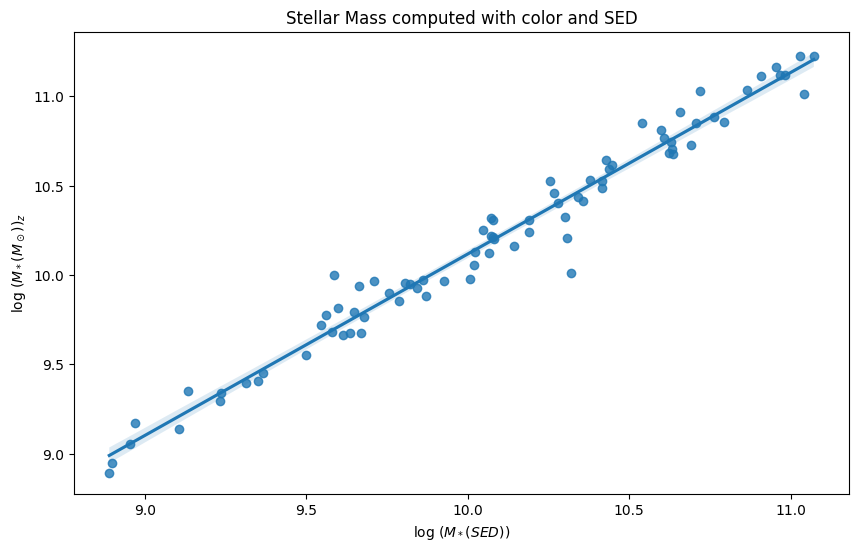

In [23]:
mass_sed = final_table_gwsl['log_M_stellar'][(final_table_gwsl['log_M_stellar'] > 0) & (final_table_gwsl['log(M_*)_z'] > 8.75)]
mass_phot = final_table_gwsl['log(M_*)_z'][(final_table_gwsl['log_M_stellar'] > 0) & (final_table_gwsl['log(M_*)_z'] > 8.75)]
# Verificar y limpiar los datos
valid_indices = np.isfinite(mass_sed) & np.isfinite(mass_phot)
mass_sed_clean = mass_sed[valid_indices]
mass_phot_clean = mass_phot[valid_indices]

# Calcular el coeficiente de correlación solo si hay datos válidos
if len(mass_sed_clean) > 0 and len(mass_phot_clean) > 0:
    correlation_coefficient = np.corrcoef(mass_sed_clean, mass_phot_clean)[0, 1]
    print("Coeficiente de correlación:", correlation_coefficient)
else:
    print("No hay suficientes datos válidos para calcular el coeficiente de correlación.")

# Configurar la figura y el tamaño
plt.figure(figsize=(10, 6))

# Graficar los datos de dispersión
#plt.scatter(mass_sed_clean, mass_phot_clean, marker='.')

# Graficar la regresión lineal
sns.regplot(x=mass_sed_clean, y=mass_phot_clean)

# Configurar etiquetas de los ejes y límites del eje x
plt.xlabel('log ($M_*(SED$))')
plt.ylabel('log ($M_*(M_\odot$))$_z$')
plt.title('Stellar Mass computed with color and SED')
# Mostrar el gráfico
#plt.show()

## Para calcular SFR

$log SFR_{NUV} (M_{\odot}yr^{-1}) = log L_{NUV}, corr(L_{\odot}) -9.33$

$log SFR_{FUV} (M_{\odot}yr^{-1}) = log L_{FUV}, corr(L_{\odot}) -9.51$

$A_{NUV} = -0.0495x^{3} + 0.4718x^{2} + 0.8998x + 0.2269$

$A_{FUV} = -0.0333y^{3} + 0.3522y^{2} + 1.1960y + 0.4967$

### La Luminosidad la calculamos con el flujo

$m_{x} = -2.5log(F) - 48.6$

#### $F = 10^{-\frac{(m_{x} + 48.6)}{2.5}}$

$L = 4\pi D^2 F$


In [4]:
grouped_decals = decals.group_by('Group_1')

valid_groups=[]

for group in grouped_decals.groups:
    if any (group['zmemb'] != 0):
        valid_groups.append(group['Group_1'][0])

filtered_table = decals[np.isin(decals['Group_1'], valid_groups)]

# Crear una función para reemplazar los valores de 'zmemb' que son 0
def replace_zeros(group):
    non_zero_values = group['zmemb'][group['zmemb'] != 0]
    if len(non_zero_values) > 0:
        replacement_value = non_zero_values[0]
        group['zmemb'] = np.where(group['zmemb'] == 0, replacement_value, group['zmemb'])
    return group

# Aplicar la función a cada grupo y unir los resultados
result_groups = []
for group in filtered_table.group_by('Group_1').groups:
    result_groups.append(replace_zeros(group))

final_table = vstack(result_groups)



In [8]:
H_0 = 67.4 #km/s/Mpc
c = 300000
final_table['Distance (Mpc)'] = (final_table['zmemb']*c)/H_0
final_table['M_FUV'] = final_table['FUV'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
final_table['M_NUV'] = final_table['NUV'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
#Contiene transformación de sistema de referencia de Vega a AB
final_table['M_w3'] = final_table['mag_w3']+5.174 - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5

L_sun = 3.83*10**33
eta_fuv = 1.98e+15
eta_nuv = 1.32e+15
eta_w3 = 2.5e+13


final_table['F_FUV'] = 10**(-(final_table['FUV']+48.6)/2.5)*eta_fuv
final_table['F_NUV'] = 10**(-(final_table['NUV']+48.6)/2.5)*eta_nuv
final_table['F_w3'] = 10**(-((final_table['mag_w3']+5.174)+48.6)/2.5)*eta_w3
final_table['L_FUV_2'] = 4*np.pi*((final_table['Distance (Mpc)']*3.086*10**24)**2)*final_table['F_FUV']
final_table['L_NUV_2'] = 4*np.pi*((final_table['Distance (Mpc)']*3.086*10**24)**2)*final_table['F_NUV']
final_table['L_w3_2'] = 4*np.pi*((final_table['Distance (Mpc)']*3.086*10**24)**2)*final_table['F_w3']

In [9]:
# Función para verificar si un valor es numérico
def is_number(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Convertir los valores enmascarados a string y eliminar espacios en blanco
final_table['mag_w3'] = [str(x).strip() for x in final_table['mag_w3']]

# Crear una máscara booleana para los valores numéricos
mask = [is_number(x) for x in final_table['mag_w3']]

# Aplicar la máscara para filtrar la tabla
final_table = final_table[mask]

# Convertir la columna a tipo flotante
final_table['mag_w3'] = final_table['mag_w3'].astype(float)

# Eliminar filas con valores NaN
final_table = final_table[~np.isnan(final_table['mag_w3'])]

# Eliminar filas con valores infinitos
final_table = final_table[np.isfinite(final_table['mag_w3'])]

# Mostrar la tabla resultante
final_table

Group_1,Gal_1,ID,ra_1,dec_1,type_1,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_1,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_1,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_1,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_1,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z,brickid,brickname,objid,type_2,ra_2,dec_2,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_2,mag_r_2,mag_i_2,mag_z_2,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_2,Gal_2,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation_2,Separation,Distance (Mpc),M_FUV,M_NUV,M_w3,F_FUV,F_NUV,F_w3,L_FUV_2,L_NUV_2,L_w3_2
int64,int64,int64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str13,float64,float64,float64,float64,float64,float64,float64,float64,str9,str9,float64,float64,str8,str13,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object
2,1,910,0.3129815262621921,13.11314170389291,SER,2.13987225133761,1111.3452,0.0166,746.5955,0.0141,36.5639,36.5639,16.3771,0.0015,1.1081,1.1081,0.2528,0.0003,49.7993,0.0245,1111.3452,0.0166,746.5955,0.0141,36.266,36.266,15.8409,0.0013,1.0998,1.0998,0.2528,0.0003,49.7993,0.0245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1111.3452,0.0166,746.5955,0.0141,35.6739,35.6739,15.4709,0.0026,1.0833,1.0833,0.2528,0.0003,49.7993,0.0245,404689,0003p130,910,SER,0.3129815262621921,13.11314170389291,0.08065711,265.1013,444.5779,0.0,644.8338,1.5809548,1.3426262,0.0,1.5098474,1.0687332,373129.8,9.556523,44885.47,-0.1056844,7462593.0,0.58465093,14950313.0,16.441471,15.880131,inf,15.47638,16.136421,16.660906,15.554382,16.187887,0.56134033,inf,0.40375042,inf,0.3132083,13.1134167,2,1,00 01 15.17,+13 06 48.3,0.018646,--,18.5922,18.186,Simbad,1.2697445983097178,0.0,82.99406528189911,-16.00303519034584,-16.40923519034584,-13.86685319034584,2.628967336476678e-12,2.5478504404776322e-12,4.640739691799074e-15,2.1671100883757975e+42,2.100243816886531e+42,3.825454072435174e+39
3,2,6959,2.837759217243158,-53.98101274211389,SER,1.29447802358204,719.5932,0.0055,336.3854,0.0049,7.9612,7.9612,18.122,0.0015,0.7598,0.7598,0.8608,0.0008,59.8707,0.3274,719.5932,0.0055,336.3854,0.0049,7.7652,7.7652,17.6359,0.0011,0.8373,0.8373,0.8608,0.0008,59.8707,0.3274,719.5932,0.0055,336.3854,0.0049,7.5781,7.5781,17.3781,0.0016,0.9113,0.9113,0.8608,0.0008,59.8707,0.3274,719.5932,0.0055,336.3854,0.0049,7.3757,7.3757,17.2826,0.0027,0.9913,0.9913,0.8608,0.0008,59.8707,0.3274,63164,0027m540,6959,SER,2.837759217243158,-53.98101274211389,0.013003452,55.225315,87.73145,112.72442,126.94051,1.2637981,1.1899415,1.1435049,1.2433984,0.8337279,222480.08,2.0223577,651481.3,-0.036698896,2463457.2,0.06467345,4009181.0,18.144655,17.64211,17.369955,17.241,17.62722,18.07626,15.657281,--,0.5025444,0.27215576,0.4011116,0.12895584,2.8379583,-53.9808889,3,2,00 11 21.11,-53 58 51.2,0.041719,--,20.0492,19.6655,Simbad,0.6135079570413903,0.0,185.6928783382789,-16.294776240354906,-16.678476240354904,-15.512695240354905,6.870450109106125e-13,6.521896932020645e-13,4.22111912537022e-15,2.8351588307714e+42,2.691324933091602e+42,1.7418863355356574e+40
3,4,7291,2.852407391719842,-53.93102230089

In [24]:
SFR_NUV=[]
SFR_FUV=[]
L=[]
for i in range(len(final_table)):
    #Razón entre L_IR y L_FUV, NUV para la correción por polvo
    x_nuv = np.log10(final_table['L_w3_2'][i]/final_table['L_NUV_2'][i])
    y_fuv = np.log10(final_table['L_w3_2'][i]/final_table['L_FUV_2'][i])
    #Calculando A_nuv y A_fuv 
    a_nuv = -0.0495*x_nuv**3 + 0.4718*x_nuv**2 + 0.8998*x_nuv + 0.2269
    a_fuv = -0.0333*y_fuv**3 + 0.3522*y_fuv**2 + 1.1960*y_fuv + 0.4967
    #Calculando la magnitud absoluta corregida por polvo
    F_FUV = 10**(-((final_table['FUV'][i] - a_fuv) + 48.6)/2.5)*eta_fuv
    F_NUV = 10**(-((final_table['NUV'][i] - a_nuv) + 48.6)/2.5)*eta_nuv
    #Calculando la Luminosidad corregida en L_sun (por eso no se multiplica por L_sun)
    L_FUV_cor = 4*np.pi*((final_table['Distance (Mpc)'][i]*3.086e+24)**2)*F_FUV/L_sun
    L_NUV_cor = 4*np.pi*((final_table['Distance (Mpc)'][i]*3.086e+24)**2)*F_NUV/L_sun
    L.append(L_FUV_cor)
    #Calculando la SFR en FUV y NUV
    sfr_FUV = np.log10(L_FUV_cor) - 9.51
    sfr_NUV = np.log10(L_NUV_cor) - 9.33
    
    SFR_NUV.append(sfr_NUV)
    SFR_FUV.append(sfr_FUV)

final_table['logSFR_NUV'] = SFR_NUV
final_table['logSFR_FUV'] = SFR_FUV
np.median(SFR_NUV)

0.675450052872387

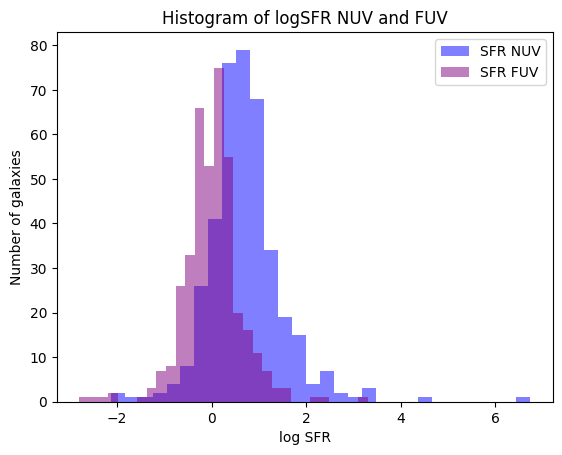

In [18]:
# Suponiendo que 'final_table' y 'final_table_z' son tus tablas
data1 = SFR_NUV
data2 = SFR_FUV

# Crear el histograma con transparencia
plt.hist(data1, bins=30, alpha=0.5, label='SFR NUV', color='blue')
plt.hist(data2, bins=30, alpha=0.5, label='SFR FUV', color='purple')

# Agregar etiquetas y título
plt.xlabel('log SFR')
plt.ylabel('Number of galaxies')
plt.title('Histogram of logSFR NUV and FUV')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()